In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
from IPython.display import HTML
from pandas_summary import DataFrameSummary
from datetime import datetime, timedelta
import math
import numpy as np
from datetime import date
from fastai.tabular.transform import add_datepart
from fastai.tabular import TabularDataBunch

In [3]:
! pwd

/home/paperspace/myfastai


In [4]:
PATH="/home/paperspace/fastai/courses/dl1_recreate/"

In [5]:
DATA_PATH=f'{PATH}data/rossmann/'

In [6]:
! ls {DATA_PATH}

googletrend.csv        state_names.csv	store_states.csv  train.csv
sample_submission.csv  store.csv	test.csv	  weather.csv


In [7]:
! cat {DATA_PATH}googletrend.csv | head

file,week,trend
Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
Rossmann_DE_SN,2012-12-30 - 2013-01-05,67
Rossmann_DE_SN,2013-01-06 - 2013-01-12,71
Rossmann_DE_SN,2013-01-13 - 2013-01-19,53
Rossmann_DE_SN,2013-01-20 - 2013-01-26,58
Rossmann_DE_SN,2013-01-27 - 2013-02-02,55
cat: write error: Broken pipe


In [8]:
! cat {DATA_PATH}train.csv | wc -l

1017210


In [9]:
! cat {DATA_PATH}test.csv | wc -l

41089


I grabbed the csv's pre-combined from a github repo -- normally the data comes in csv "shards" that have to be combined to create the entire dataset. 

In [10]:
csvs = ['googletrend', 'state_names', 'store_states', 'train', 'store', 'test', 'weather']

In [11]:
dfs = [pd.read_csv(f'{DATA_PATH}{fname}.csv') for fname in csvs]

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3183: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [12]:
for (name, frame) in [(j, i.head()) for (i, j) in zip(dfs, csvs)]: display(name, frame)

'googletrend'

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


'state_names'

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


'store_states'

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


'train'

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


'store'

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


'test'

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


'weather'

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


In [13]:
googletrend, state_names, store_states, train, store, test, weather = dfs

In [14]:
googletrend.dtypes

file     object
week     object
trend     int64
dtype: object

In [15]:
[display(name, i.dtypes) for (name, i) in zip(csvs, dfs)]

'googletrend'

file     object
week     object
trend     int64
dtype: object

'state_names'

StateName    object
State        object
dtype: object

'store_states'

Store     int64
State    object
dtype: object

'train'

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

'store'

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

'test'

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

'weather'

file                           object
Date                           object
Max_TemperatureC                int64
Mean_TemperatureC               int64
Min_TemperatureC                int64
Dew_PointC                      int64
MeanDew_PointC                  int64
Min_DewpointC                   int64
Max_Humidity                    int64
Mean_Humidity                   int64
Min_Humidity                    int64
Max_Sea_Level_PressurehPa       int64
Mean_Sea_Level_PressurehPa      int64
Min_Sea_Level_PressurehPa       int64
Max_VisibilityKm              float64
Mean_VisibilityKm             float64
Min_VisibilitykM              float64
Max_Wind_SpeedKm_h              int64
Mean_Wind_SpeedKm_h             int64
Max_Gust_SpeedKm_h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

[None, None, None, None, None, None, None]

In [16]:
train['StateHoliday'] = train['StateHoliday'] != '0'

In [17]:
display(train.dtypes)

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday       bool
SchoolHoliday     int64
dtype: object

In [18]:
train.Date.head()

0    2015-07-31
1    2015-07-31
2    2015-07-31
3    2015-07-31
4    2015-07-31
Name: Date, dtype: object

In [19]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [20]:
googletrend.file.unique()

array(['Rossmann_DE_SN', 'Rossmann_DE', 'Rossmann_DE_BY', 'Rossmann_DE_TH', 'Rossmann_DE_NW', 'Rossmann_DE_BE',
       'Rossmann_DE_RP', 'Rossmann_DE_BW', 'Rossmann_DE_NI', 'Rossmann_DE_SH', 'Rossmann_DE_HE', 'Rossmann_DE_ST',
       'Rossmann_DE_HH', 'Rossmann_DE_SL'], dtype=object)

In [21]:
googletrend.file = [i.split('_')[-1] for i in googletrend.file]

In [22]:
googletrend.week = [i.split(' - ')[0] for i in googletrend.week]

In [23]:
googletrend.head()

,file,week,trend
0,SN,2012-12-02,96
1,SN,2012-12-09,95
2,SN,2012-12-16,91
3,SN,2012-12-23,48
4,SN,2012-12-30,67


In [24]:
googletrend.columns = ['state', 'week', 'trend']

In [25]:
googletrend.head()

,state,week,trend
0,SN,2012-12-02,96
1,SN,2012-12-09,95
2,SN,2012-12-16,91
3,SN,2012-12-23,48
4,SN,2012-12-30,67


In [26]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


In [27]:
weather.isna().sum(axis=0)

file                              0
Date                              0
Max_TemperatureC                  0
Mean_TemperatureC                 0
Min_TemperatureC                  0
Dew_PointC                        0
MeanDew_PointC                    0
Min_DewpointC                     0
Max_Humidity                      0
Mean_Humidity                     0
Min_Humidity                      0
Max_Sea_Level_PressurehPa         0
Mean_Sea_Level_PressurehPa        0
Min_Sea_Level_PressurehPa         0
Max_VisibilityKm                381
Mean_VisibilityKm               381
Min_VisibilitykM                381
Max_Wind_SpeedKm_h                0
Mean_Wind_SpeedKm_h               0
Max_Gust_SpeedKm_h            12236
Precipitationmm                   0
CloudCover                     1173
Events                         3951
WindDirDegrees                    0
dtype: int64

In [28]:
weather.size

380160

In [29]:
weather.describe()

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,...,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees
count,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,...,15840.000000,15459.000000,15459.000000,15459.000000,15840.000000,15840.000000,3604.000000,15840.000000,14667.000000,15840.000000
mean,14.644129,10.388952,6.198990,8.587816,6.205808,3.626136,93.659596,74.282891,50.158586,1018.532197,...,1012.307955,24.057572,12.239796,7.025163,22.766604,11.972222,48.864317,0.831718,5.551306,175.896717
std,8.646012,7.379260,6.526391,6.244780,6.086768,6.128390,7.678530,13.486552,19.960216,7.788720,...,8.600585,8.976799,5.067944,4.980602,8.988618,5.872844,13.026954,2.513506,1.687710,101.588872
min,-11.000000,-13.000000,-15.000000,-14.000000,-15.000000,-73.000000,44.000000,30.000000,4.000000,976.000000,...,970.000000,0.000000,0.000000,0.000000,3.000000,2.000000,21.000000,0.000000,0.000000,-1.000000
25%,8.000000,4.000000,1.000000,4.000000,2.000000,-1.000000,90.750000,65.000000,34.000000,1014.000000,...,1007.000000,14.000000,10.000000,3.000000,16.000000,8.000000,39.000000,0.000000,5.000000,80.000000
50%,15.000000,11.000000,7.000000,9.000000,7.000000,4.000000,94.000000,76.000000,49.000000,1019.000000,...,1013.000000,31.000000,11.000000,7.000000,21.000000,11.000000,48.000000,0.000000,6.000000,202.000000
75%,21.000000,16.000000,11.000000,13.000000,11.000000,8.000000,100.000000,85.000000,66.000000,1024.000000,...,1018.000000,31.000000,14.000000,10.000000,27.000000,14.000000,55.000000,0.250000,7.000000,256.000000
max,39.000000,31.000000,24.000000,25.000000,20.000000,19.000000,100.000000,100.000000,100.000000,1043.000000,...,1038.000000,31.000000,31.000000,31.000000,101.000000,53.000000,111.000000,58.930000,8.000000,360.000000


In [30]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,False,1
1,2,5,2015-07-31,6064,625,1,1,False,1
2,3,5,2015-07-31,8314,821,1,1,False,1
3,4,5,2015-07-31,13995,1498,1,1,False,1
4,5,5,2015-07-31,4822,559,1,1,False,1


In [31]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [32]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,False,1
1,2,5,2015-07-31,6064,625,1,1,False,1
2,3,5,2015-07-31,8314,821,1,1,False,1
3,4,5,2015-07-31,13995,1498,1,1,False,1
4,5,5,2015-07-31,4822,559,1,1,False,1


# Impute Missing Values, Compute Some Durations

In [33]:
avg_days_in_month = 30.42

In [34]:
store['Promo2SinceWeek'].describe()

count    571.000000
mean      23.595447
std       14.141984
min        1.000000
25%       13.000000
50%       22.000000
75%       37.000000
max       50.000000
Name: Promo2SinceWeek, dtype: float64

In [35]:
store['Promo2SinceMonth'] = np.ceil((store['Promo2SinceWeek'].astype(np.float64) * 7) / avg_days_in_month)

In [36]:
store['CompetitionDistance'].fillna(0.0, inplace=True)
store['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
store['CompetitionOpenSinceYear'].fillna(1900, inplace=True)
store['PromoInterval'].fillna('', inplace=True)
store['Promo2SinceWeek'].fillna(1, inplace=True)
store['Promo2SinceMonth'].fillna(1, inplace=True)
store['Promo2SinceYear'].fillna(1900, inplace=True)

In [37]:
store['Promo2SinceYear'].describe(), store['Promo2SinceYear'].isna().sum()

(count    1115.000000
 mean     1957.234978
 std        55.903309
 min      1900.000000
 25%      1900.000000
 50%      2009.000000
 75%      2012.000000
 max      2015.000000
 Name: Promo2SinceYear, dtype: float64, 0)

In [38]:
store['Promo2SinceMonth'].describe(), store['Promo2SinceMonth'].isna().sum()

(count    1115.000000
 mean        3.642152
 std         3.481706
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         6.000000
 max        12.000000
 Name: Promo2SinceMonth, dtype: float64, 0)

In [39]:
store['Promo2Since'] = store.apply(lambda x: datetime(year=int(x['Promo2SinceYear']), month=int(x['Promo2SinceMonth']), day=15), axis=1)

In [40]:
train_store = train.merge(store, on='Store', suffixes=['', '_y'])

In [ ]:
train_store['CompetitionOpenSince'] = train_store.apply(lambda x: datetime(year=int(x['CompetitionOpenSinceYear']), month=int(x['CompetitionOpenSinceMonth']), day=15), axis=1)

In [ ]:
train_store['Date'] = train_store['Date'].astype('datetime64[D]')

In [ ]:
train_store['CompetitionDaysOpen'] = np.floor(train_store.apply(lambda x: (x['Date'] - x['CompetitionOpenSince']) / timedelta(days=1), axis=1))

In [ ]:
train_store['CompetitionWeeksOpen'] = np.floor(train_store['CompetitionDaysOpen'] / 7.0)

In [ ]:
train_store['CompetitionMonthsOpen'] = np.floor(train_store['CompetitionDaysOpen'] / avg_days_in_month)

In [ ]:
train_store['Promo2Days'] = np.floor(train_store.apply(lambda x: (x['Date'] - x['Promo2Since']) / timedelta(days=1), axis=1))

In [ ]:
train_store['Promo2Weeks'] = np.floor(np.ceil(train_store['Promo2Days'] / 7.0))

In [ ]:
train_store['Promo2Months'] = np.floor(np.ceil(train_store['Promo2Days'] / avg_days_in_month))

In [49]:
weather.isna().sum(axis=0)

file                              0
Date                              0
Max_TemperatureC                  0
Mean_TemperatureC                 0
Min_TemperatureC                  0
Dew_PointC                        0
MeanDew_PointC                    0
Min_DewpointC                     0
Max_Humidity                      0
Mean_Humidity                     0
Min_Humidity                      0
Max_Sea_Level_PressurehPa         0
Mean_Sea_Level_PressurehPa        0
Min_Sea_Level_PressurehPa         0
Max_VisibilityKm                381
Mean_VisibilityKm               381
Min_VisibilitykM                381
Max_Wind_SpeedKm_h                0
Mean_Wind_SpeedKm_h               0
Max_Gust_SpeedKm_h            12236
Precipitationmm                   0
CloudCover                     1173
Events                         3951
WindDirDegrees                    0
dtype: int64

In [50]:
weather['Max_VisibilityKm'].fillna(0.0, inplace=True)
weather['Mean_VisibilityKm'].fillna(0.0, inplace=True)
weather['Min_VisibilitykM'].fillna(0.0, inplace=True)
weather['Max_Gust_SpeedKm_h'].fillna(0.0, inplace=True)
weather['CloudCover'].fillna(0.0, inplace=True)
weather['Events'].fillna(0.0, inplace=True)

In [51]:
train_store_dfs = DataFrameSummary(store); train_store_dfs.columns_stats

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2SinceMonth,Promo2Since
counts,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115
uniques,1115,4,3,655,12,23,2,24,8,4,12,52
missing,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,categorical,categorical,numeric,numeric,numeric,bool,numeric,numeric,categorical,numeric,date


In [52]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Promo2SinceMonth,Promo2Since,CompetitionOpenSince,CompetitionDaysOpen,CompetitionWeeksOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,Promo2Months
0,1,5,2015-07-31,5263,555,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2510.0,358.0,82.0,42200.0,6029.0,1388.0
1,1,4,2015-07-30,5020,546,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2509.0,358.0,82.0,42199.0,6029.0,1388.0
2,1,3,2015-07-29,4782,523,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2508.0,358.0,82.0,42198.0,6029.0,1388.0
3,1,2,2015-07-28,5011,560,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2507.0,358.0,82.0,42197.0,6029.0,1388.0
4,1,1,2015-07-27,6102,612,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2506.0,358.0,82.0,42196.0,6028.0,1388.0


In [53]:
store_states.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [54]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,0.0,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,0.0,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,0.0,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,0.0,0.00,7.0,Rain,268


In [55]:
weather_state_names = weather.merge(state_names, how='left', left_on='file', right_on='StateName', suffixes=['', '_y'])

In [56]:
weather_state_names.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,State
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,4.0,39,26,58.0,5.08,6.0,Rain,215,NordrheinWestfalen,NW
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,10.0,24,16,0.0,0.00,6.0,Rain,225,NordrheinWestfalen,NW
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,2.0,26,21,0.0,1.02,7.0,Rain,240,NordrheinWestfalen,NW
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,2.0,23,14,0.0,0.25,7.0,Rain,263,NordrheinWestfalen,NW
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,3.0,16,10,0.0,0.00,7.0,Rain,268,NordrheinWestfalen,NW


In [57]:
weather_state_names.drop('file', inplace=True, axis=1)

In [58]:
weather_state_names.drop('StateName', inplace=True, axis=1)

In [59]:
weather_state_names.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
0,2013-01-01,8,4,2,7,5,1,94,87,65,...,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,NW
1,2013-01-02,7,4,1,5,3,2,93,85,78,...,14.0,10.0,24,16,0.0,0.00,6.0,Rain,225,NW
2,2013-01-03,11,8,6,10,8,4,100,93,77,...,8.0,2.0,26,21,0.0,1.02,7.0,Rain,240,NW
3,2013-01-04,9,9,8,9,9,8,100,94,87,...,5.0,2.0,23,14,0.0,0.25,7.0,Rain,263,NW
4,2013-01-05,8,8,7,8,7,6,100,94,87,...,6.0,3.0,16,10,0.0,0.00,7.0,Rain,268,NW


In [60]:
wsn_summary = DataFrameSummary(weather_state_names)

In [61]:
wsn_summary.columns_stats

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840
uniques,990,51,45,40,40,36,40,53,71,93,...,32,24,44,29,48,41,9,22,362,16
missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,categorical,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,categorical,numeric,categorical


In [62]:
weather_state_names.describe()

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,...,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees
count,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,...,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000
mean,14.644129,10.388952,6.198990,8.587816,6.205808,3.626136,93.659596,74.282891,50.158586,1018.532197,...,1012.307955,23.478914,11.945391,6.856187,22.766604,11.972222,11.117866,0.831718,5.140215,175.896717
std,8.646012,7.379260,6.526391,6.244780,6.086768,6.128390,7.678530,13.486552,19.960216,7.788720,...,8.600585,9.603731,5.346329,5.036695,8.988618,5.872844,21.407700,2.513506,2.179599,101.588872
min,-11.000000,-13.000000,-15.000000,-14.000000,-15.000000,-73.000000,44.000000,30.000000,4.000000,976.000000,...,970.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,-1.000000
25%,8.000000,4.000000,1.000000,4.000000,2.000000,-1.000000,90.750000,65.000000,34.000000,1014.000000,...,1007.000000,13.000000,9.000000,3.000000,16.000000,8.000000,0.000000,0.000000,4.000000,80.000000
50%,15.000000,11.000000,7.000000,9.000000,7.000000,4.000000,94.000000,76.000000,49.000000,1019.000000,...,1013.000000,31.000000,11.000000,6.000000,21.000000,11.000000,0.000000,0.000000,6.000000,202.000000
75%,21.000000,16.000000,11.000000,13.000000,11.000000,8.000000,100.000000,85.000000,66.000000,1024.000000,...,1018.000000,31.000000,14.000000,10.000000,27.000000,14.000000,0.000000,0.250000,7.000000,256.000000
max,39.000000,31.000000,24.000000,25.000000,20.000000,19.000000,100.000000,100.000000,100.000000,1043.000000,...,1038.000000,31.000000,31.000000,31.000000,101.000000,53.000000,111.000000,58.930000,8.000000,360.000000


In [63]:
weather_state_names.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
0,2013-01-01,8,4,2,7,5,1,94,87,65,...,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,NW
1,2013-01-02,7,4,1,5,3,2,93,85,78,...,14.0,10.0,24,16,0.0,0.00,6.0,Rain,225,NW
2,2013-01-03,11,8,6,10,8,4,100,93,77,...,8.0,2.0,26,21,0.0,1.02,7.0,Rain,240,NW
3,2013-01-04,9,9,8,9,9,8,100,94,87,...,5.0,2.0,23,14,0.0,0.25,7.0,Rain,263,NW
4,2013-01-05,8,8,7,8,7,6,100,94,87,...,6.0,3.0,16,10,0.0,0.00,7.0,Rain,268,NW


In [64]:
# weather_state_names.to_feather('weather_state_names')

In [65]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Promo2SinceMonth,Promo2Since,CompetitionOpenSince,CompetitionDaysOpen,CompetitionWeeksOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,Promo2Months
0,1,5,2015-07-31,5263,555,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2510.0,358.0,82.0,42200.0,6029.0,1388.0
1,1,4,2015-07-30,5020,546,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2509.0,358.0,82.0,42199.0,6029.0,1388.0
2,1,3,2015-07-29,4782,523,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2508.0,358.0,82.0,42198.0,6029.0,1388.0
3,1,2,2015-07-28,5011,560,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2507.0,358.0,82.0,42197.0,6029.0,1388.0
4,1,1,2015-07-27,6102,612,1,1,False,1,c,...,,1.0,1900-01-15,2008-09-15,2506.0,358.0,82.0,42196.0,6028.0,1388.0


In [66]:
store_states.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [67]:
train_store_state = train_store.merge(store_states, how='left', on='Store', suffixes=['', '_y'])

In [68]:
weather_state_names['Date'] = weather_state_names['Date'].astype('datetime64[D]')

In [69]:
train_store_state_weather = train_store_state.merge(weather_state_names, how='left', on=['State', 'Date'], suffixes=['', '_y'])

In [70]:
train_store_state_weather.drop('Promo2Since', inplace=True, axis=1)
train_store_state_weather.drop('CompetitionOpenSince', inplace=True, axis=1)

In [71]:
train_store_state_weather.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1,5,2015-07-31,5263,555,1,1,False,1,c,...,31.0,15.0,10.0,24,11,0.0,0.00,1.0,Fog,13
1,1,4,2015-07-30,5020,546,1,1,False,1,c,...,10.0,10.0,10.0,29,11,53.0,0.00,4.0,Rain,253
2,1,3,2015-07-29,4782,523,1,1,False,1,c,...,31.0,11.0,10.0,32,21,42.0,0.00,5.0,Rain,231
3,1,2,2015-07-28,5011,560,1,1,False,1,c,...,14.0,10.0,10.0,40,23,55.0,0.00,5.0,Rain,236
4,1,1,2015-07-27,6102,612,1,1,False,1,c,...,31.0,12.0,10.0,50,21,63.0,2.03,6.0,Rain,211


In [72]:
add_datepart(train_store_state_weather, 'Date', False, False)

In [73]:
train_store_state_weather.isna().sum(axis=0)

Store                         0
DayOfWeek                     0
Date                          0
Sales                         0
Customers                     0
Open                          0
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
Promo2SinceMonth              0
CompetitionDaysOpen           0
CompetitionWeeksOpen          0
CompetitionMonthsOpen         0
Promo2Days                    0
Promo2Weeks                   0
Promo2Months                  0
State                         0
Max_TemperatureC              0
Mean_TemperatureC             0
Min_TemperatureC              0
Dew_PointC                    0
                             ..
Min_Dewp

Todo:
* Identify columns that involve "since" and "until", and write some logic that does that
* 7-day rolling averages in both directions for a handful of columns

In [74]:
# rename for clarity
base_df = train_store_state_weather

In [75]:
def get_elapsed(df, date_col, change_col, prefix):
    last_store = -1
    last_date = np.datetime64('NaT')
    vals = []
    for (date, store, col) in zip(df[date_col], df['Store'], df[change_col]):
        if store != last_store: 
            last_date = np.datetime64('NaT')
            last_store = store
        if col:
            last_date = date
        vals.append((date - last_date) / timedelta(days=1))
    df[prefix + change_col] = vals
    return df

In [76]:
a = pd.Series(pd.date_range(pd.datetime.today(), periods=13)).astype('datetime64[D]')

In [77]:
b = [False] * 4 + [True] + [False] * 5 + [False] + [True, False]

In [78]:
b

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False]

In [79]:
c = [1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]

In [80]:
test_df = pd.DataFrame({'a': a, 'b': b, 'Store': c})

In [81]:
get_elapsed(test_df, 'a', 'b', 'After')

,a,b,Store,Afterb
0,2019-01-11,False,1,737069.0
1,2019-01-12,False,1,737070.0
2,2019-01-13,False,2,737071.0
3,2019-01-14,False,2,737072.0
4,2019-01-15,True,2,0.0
5,2019-01-16,False,2,1.0
6,2019-01-17,False,2,2.0
7,2019-01-18,False,2,3.0
8,2019-01-19,False,2,4.0
9,2019-01-20,False,2,5.0


In [82]:
base_df.sort_values(by=['Store', 'Date'], ascending=[True, True], inplace=True)

In [83]:
base_df = get_elapsed(base_df, 'Date', 'StateHoliday', 'After')

In [84]:
base_df.sort_values(by=['Date', 'Store'], ascending=[True, False], inplace=True)

In [85]:
base_df = get_elapsed(base_df, 'Date', 'StateHoliday', 'Before')

In [86]:
base_df.sort_values(by=['Store', 'Date'], ascending=[True, True], inplace=True)

In [87]:
tmp_df = base_df.set_index('Date')

In [88]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo'] 

In [89]:
fwd = tmp_df[['Store'] + columns].sort_index().groupby('Store').rolling(7, min_periods=1).sum()
bwd = tmp_df[['Store'] + columns].sort_index(ascending=False).groupby('Store').rolling(7, min_periods=1).sum()

In [90]:
fwd = fwd.drop('Store', axis=1).reset_index()
bwd = bwd.drop('Store', axis=1).reset_index()

In [91]:
fwd.head()

,Store,Date,SchoolHoliday,StateHoliday,Promo
0,1,2013-01-01,1.0,1.0,0.0
1,1,2013-01-02,2.0,1.0,0.0
2,1,2013-01-03,3.0,1.0,0.0
3,1,2013-01-04,4.0,1.0,0.0
4,1,2013-01-05,5.0,1.0,0.0


In [92]:
bwd.head()

,Store,Date,SchoolHoliday,StateHoliday,Promo
0,1,2015-07-31,1.0,0.0,1.0
1,1,2015-07-30,2.0,0.0,2.0
2,1,2015-07-29,3.0,0.0,3.0
3,1,2015-07-28,4.0,0.0,4.0
4,1,2015-07-27,5.0,0.0,5.0


In [93]:
base_df = base_df.merge(fwd, on=['Store', 'Date'], how='left', suffixes=['', '_fwd'])

In [94]:
base_df = base_df.merge(bwd, on=['Store', 'Date'], how='left', suffixes=['', '_bwd'])

In [95]:
base_df.isna().sum().sum()

0

In [96]:
base_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Promo2SinceMonth',
       'CompetitionDaysOpen', 'CompetitionWeeksOpen', 'CompetitionMonthsOpen',
       'Promo2Days', 'Promo2Weeks', 'Promo2Months', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'Year',
       'Month', 'Week', 'Day', 'Dayofw

* Look up heuristic for max number of categories
* Look thru again for any cols that should have been removed
* Split into cont and and cat and do whatever preproc needs to be done
* Create a fastai tabular model

In [97]:
base_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Dayofyear,Elapsed,AfterStateHoliday,BeforeStateHoliday,SchoolHoliday_fwd,StateHoliday_fwd,Promo_fwd,SchoolHoliday_bwd,StateHoliday_bwd,Promo_bwd
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,5.244756e+00,1.974140e+03,...,1.622764e+02,1.397180e+09,8.864203e+01,6.181310e+05,1.232767e+00,1.115655e+00,2.648679e+00,1.230985e+00,1.108780e+00,2.670601e+00
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,3.928522e+00,5.085323e+01,...,1.016162e+02,2.371283e+07,6.756928e+03,2.691515e+05,2.053886e+00,2.261691e+00,1.910292e+00,2.055302e+00,2.263417e+00,1.902708e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+03,...,1.000000e+00,1.356998e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,1.000000e+00,1.900000e+03,...,7.700000e+01,1.376698e+09,4.000000e+00,7.349510e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,2.006000e+03,...,1.530000e+02,1.396397e+09,1.600000e+01,7.351870e+05,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,...,2.410000e+02,1.418342e+09,4.200000e+01,7.355680e+05,2.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,...,3.650000e+02,1.438301e+09,7.349540e+05,7.358090e+05,7.000000e+00,7.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00


In [98]:
for i in base_df.columns: print("{}: {}".format(i, len(base_df[i].unique())))

Store: 1115
DayOfWeek: 7
Date: 942
Sales: 21734
Customers: 4086
Open: 2
Promo: 2
StateHoliday: 2
SchoolHoliday: 2
StoreType: 4
Assortment: 3
CompetitionDistance: 655
CompetitionOpenSinceMonth: 12
CompetitionOpenSinceYear: 23
Promo2: 2
Promo2SinceWeek: 24
Promo2SinceYear: 8
PromoInterval: 4
Promo2SinceMonth: 12
CompetitionDaysOpen: 11345
CompetitionWeeksOpen: 1625
CompetitionMonthsOpen: 378
Promo2Days: 4014
Promo2Weeks: 574
Promo2Months: 134
State: 12
Max_TemperatureC: 50
Mean_TemperatureC: 45
Min_TemperatureC: 40
Dew_PointC: 39
MeanDew_PointC: 36
Min_DewpointC: 38
Max_Humidity: 52
Mean_Humidity: 71
Min_Humidity: 93
Max_Sea_Level_PressurehPa: 66
Mean_Sea_Level_PressurehPa: 67
Min_Sea_Level_PressurehPa: 68
Max_VisibilityKm: 24
Mean_VisibilityKm: 32
Min_VisibilitykM: 24
Max_Wind_SpeedKm_h: 42
Mean_Wind_SpeedKm_h: 27
Max_Gust_SpeedKm_h: 46
Precipitationmm: 40
CloudCover: 9
Events: 22
WindDirDegrees: 362
Year: 3
Month: 12
Week: 52
Day: 31
Dayofweek: 7
Dayofyear: 365
Is_month_end: 2
Is_month

In [99]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fwd', 'Promo_bwd', 'StateHoliday_fwd', 'StateHoliday_bwd',
    'SchoolHoliday_fwd', 'SchoolHoliday_bwd']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [100]:
base_df['Sales']

0              0
1           5530
2           4327
3           4486
4           4997
5              0
6           7176
7           5580
8           5471
9           4892
10          4881
11          4952
12             0
13          4717
14          3900
15          4008
16          4044
17          4127
18          5182
19             0
20          5394
21          5720
22          5578
23          5195
24          5586
25          5598
26             0
27          4055
28          3725
29          4601
           ...  
1017179     6858
1017180     7412
1017181     6543
1017182        0
1017183     6501
1017184     5138
1017185     5900
1017186     5686
1017187     5844
1017188     7164
1017189        0
1017190    10598
1017191     7562
1017192     6039
1017193     6590
1017194     7874
1017195     7264
1017196        0
1017197     6083
1017198     5074
1017199     5342
1017200     6150
1017201     5816
1017202     6897
1017203        0
1017204    10712
1017205     8093
1017206     76

In [101]:
base_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Promo2SinceMonth',
       'CompetitionDaysOpen', 'CompetitionWeeksOpen', 'CompetitionMonthsOpen',
       'Promo2Days', 'Promo2Weeks', 'Promo2Months', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'Year',
       'Month', 'Week', 'Day', 'Dayofw

In [102]:
base_df.loc[:, cat_vars].describe()

,Store,DayOfWeek,Year,Month,Day,CompetitionMonthsOpen,Promo2Weeks,CompetitionOpenSinceYear,Promo2SinceYear,Week,Promo_fwd,Promo_bwd,StateHoliday_fwd,StateHoliday_bwd,SchoolHoliday_fwd,SchoolHoliday_bwd
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2.013832e+03,5.846762e+00,1.570279e+01,4.766904e+02,3.031203e+03,1.974140e+03,1.955939e+03,2.361551e+01,2.648679e+00,2.670601e+00,1.115655e+00,1.108780e+00,1.232767e+00,1.230985e+00
std,3.219087e+02,1.997391e+00,7.773960e-01,3.326097e+00,8.787638e+00,6.135143e+02,2.927957e+03,5.085323e+01,5.588876e+01,1.443338e+01,1.910292e+00,1.902708e+00,2.261691e+00,2.263417e+00,2.053886e+00,2.055302e+00
min,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,-3.200000e+01,-1.270000e+02,1.900000e+03,1.900000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,2.900000e+01,1.070000e+02,1.900000e+03,1.900000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,9.100000e+01,3.060000e+02,2.006000e+03,2.009000e+03,2.200000e+01,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,1.362000e+03,5.961000e+03,2.011000e+03,2.012000e+03,3.500000e+01,5.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
max,1.115000e+03,7.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,1.387000e+03,6.029000e+03,2.015000e+03,2.015000e+03,5.200000e+01,5.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00


In [103]:
base_df.loc[:, contin_vars].describe()

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,0.0,0.0,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.415982e+03,1.432830e+01,1.007386e+01,5.900282e+00,9.328379e+01,7.395215e+01,4.992343e+01,2.267291e+01,1.187079e+01,5.085158e+00,NaN,NaN,8.864203e+01,6.181310e+05,3.815145e-01,1.786467e-01
std,7.710253e+03,8.464778e+00,7.239083e+00,6.459730e+00,7.717332e+00,1.320645e+01,1.962635e+01,8.940418e+00,5.897191e+00,2.197308e+00,NaN,NaN,6.756928e+03,2.691515e+05,4.857586e-01,3.830564e-01
min,0.000000e+00,-1.100000e+01,-1.300000e+01,-1.500000e+01,4.400000e+01,3.000000e+01,4.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+02,8.000000e+00,4.000000e+00,1.000000e+00,8.800000e+01,6.400000e+01,3.400000e+01,1.600000e+01,8.000000e+00,4.000000e+00,NaN,NaN,4.000000e+00,7.349510e+05,0.000000e+00,0.000000e+00
50%,2.320000e+03,1.500000e+01,1.000000e+01,6.000000e+00,9.400000e+01,7.500000e+01,4.900000e+01,2.100000e+01,1.100000e+01,6.000000e+00,NaN,NaN,1.600000e+01,7.351870e+05,0.000000e+00,0.000000e+00
75%,6.880000e+03,2.100000e+01,1.600000e+01,1.100000e+01,1.000000e+02,8.400000e+01,6.500000e+01,2.700000e+01,1.400000e+01,7.000000e+00,NaN,NaN,4.200000e+01,7.355680e+05,1.000000e+00,0.000000e+00
max,7.586000e+04,3.800000e+01,3.100000e+01,2.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.010000e+02,5.300000e+01,8.000000e+00,NaN,NaN,7.349540e+05,7.358090e+05,1.000000e+00,1.000000e+00


In [104]:
googletrend.head()

,state,week,trend
0,SN,2012-12-02,96
1,SN,2012-12-09,95
2,SN,2012-12-16,91
3,SN,2012-12-23,48
4,SN,2012-12-30,67


In [105]:
trends = googletrend.loc[googletrend['state'] != 'DE', :]

In [106]:
trends_DE = googletrend.loc[googletrend['state'] == 'DE', :]

In [107]:
trends.head()

,state,week,trend
0,SN,2012-12-02,96
1,SN,2012-12-09,95
2,SN,2012-12-16,91
3,SN,2012-12-23,48
4,SN,2012-12-30,67


In [108]:
trends_DE.head()

,state,week,trend
148,DE,2012-12-02,77
149,DE,2012-12-09,76
150,DE,2012-12-16,85
151,DE,2012-12-23,59
152,DE,2012-12-30,61


In [109]:
trends['week'] = trends['week'].astype('datetime64[D]')
trends_DE['week'] = trends_DE['week'].astype('datetime64[D]')

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
trends_DE.columns = ['state', 'week', 'trend_DE']

In [111]:
base_df = base_df.merge(trends, left_on=['State', 'Date'], right_on=['state', 'week'], how='left')

In [112]:
base_df = base_df.merge(trends_DE, left_on=['Date'], right_on=['week'], how='left', suffixes=['', '_DE'])

In [113]:
base_df.loc[:, cat_vars].head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Promo2SinceYear,State,Week,Events,Promo_fwd,Promo_bwd,StateHoliday_fwd,StateHoliday_bwd,SchoolHoliday_fwd,SchoolHoliday_bwd
0,1,2,2013,1,1,True,51.0,5895.0,c,a,...,1900.0,HE,1,Rain,0.0,1.0,1.0,1.0,1.0,7.0
1,1,3,2013,1,2,False,51.0,5895.0,c,a,...,1900.0,HE,1,0,0.0,2.0,1.0,0.0,2.0,7.0
2,1,4,2013,1,3,False,51.0,5895.0,c,a,...,1900.0,HE,1,Rain,0.0,3.0,1.0,0.0,3.0,7.0
3,1,5,2013,1,4,False,51.0,5895.0,c,a,...,1900.0,HE,1,Rain,0.0,4.0,1.0,0.0,4.0,7.0
4,1,6,2013,1,5,False,51.0,5895.0,c,a,...,1900.0,HE,1,Rain,0.0,5.0,1.0,0.0,5.0,7.0


In [114]:
base_df.loc[:, contin_vars].head()

,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
0,1270.0,8,6,3,93,80,59,23,14,6.0,NaN,NaN,0.0,0.0,0,1
1,1270.0,6,3,0,100,85,67,19,11,6.0,NaN,NaN,1.0,734869.0,0,1
2,1270.0,7,4,3,100,90,77,29,19,7.0,NaN,NaN,2.0,734870.0,0,1
3,1270.0,11,9,6,100,93,79,21,13,6.0,NaN,NaN,3.0,734871.0,0,1
4,1270.0,9,8,7,87,78,67,24,18,7.0,NaN,NaN,4.0,734872.0,0,1


In [115]:
base_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Promo2SinceMonth',
       'CompetitionDaysOpen', 'CompetitionWeeksOpen', 'CompetitionMonthsOpen',
       'Promo2Days', 'Promo2Weeks', 'Promo2Months', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'Year',
       'Month', 'Week', 'Day', 'Dayofw

In [116]:
base_df.loc[:, ['Date', 'State'] + contin_vars]

,Date,State,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
0,2013-01-01,HE,1270.0,8,6,3,93,80,59,23,14,6.0,NaN,NaN,0.0,0.0,0,1
1,2013-01-02,HE,1270.0,6,3,0,100,85,67,19,11,6.0,NaN,NaN,1.0,734869.0,0,1
2,2013-01-03,HE,1270.0,7,4,3,100,90,77,29,19,7.0,NaN,NaN,2.0,734870.0,0,1
3,2013-01-04,HE,1270.0,11,9,6,100,93,79,21,13,6.0,NaN,NaN,3.0,734871.0,0,1
4,2013-01-05,HE,1270.0,9,8,7,87,78,67,24,18,7.0,NaN,NaN,4.0,734872.0,0,1
5,2013-01-06,HE,1270.0,10,8,7,93,82,66,21,13,7.0,73.0,62.0,5.0,734873.0,0,1
6,2013-01-07,HE,1270.0,9,8,6,93,78,64,14,8,6.0,NaN,NaN,6.0,734874.0,1,1
7,2013-01-08,HE,1270.0,6,5,4,100,89,76,16,10,7.0,NaN,NaN,7.0,734875.0,1,1
8,2013-01-09,HE,1270.0,5,4,3,100,87,69,19,13,7.0,NaN,NaN,8.0,734876.0,1,1
9,2013-01-10,HE,1270.0,4,2,1,100,92,79,21,13,6.0,NaN,NaN,9.0,734877.0,1,1


In [117]:
base_df['trend_DE'] = base_df['trend_DE'].fillna(method='ffill').fillna(method='backfill')

In [118]:
base_df['trend'] = base_df['trend'].fillna(method='ffill').fillna(method='backfill')

In [119]:
base_df.loc[:, ['Date', 'State'] + contin_vars]

,Date,State,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
0,2013-01-01,HE,1270.0,8,6,3,93,80,59,23,14,6.0,73.0,62.0,0.0,0.0,0,1
1,2013-01-02,HE,1270.0,6,3,0,100,85,67,19,11,6.0,73.0,62.0,1.0,734869.0,0,1
2,2013-01-03,HE,1270.0,7,4,3,100,90,77,29,19,7.0,73.0,62.0,2.0,734870.0,0,1
3,2013-01-04,HE,1270.0,11,9,6,100,93,79,21,13,6.0,73.0,62.0,3.0,734871.0,0,1
4,2013-01-05,HE,1270.0,9,8,7,87,78,67,24,18,7.0,73.0,62.0,4.0,734872.0,0,1
5,2013-01-06,HE,1270.0,10,8,7,93,82,66,21,13,7.0,73.0,62.0,5.0,734873.0,0,1
6,2013-01-07,HE,1270.0,9,8,6,93,78,64,14,8,6.0,73.0,62.0,6.0,734874.0,1,1
7,2013-01-08,HE,1270.0,6,5,4,100,89,76,16,10,7.0,73.0,62.0,7.0,734875.0,1,1
8,2013-01-09,HE,1270.0,5,4,3,100,87,69,19,13,7.0,73.0,62.0,8.0,734876.0,1,1
9,2013-01-10,HE,1270.0,4,2,1,100,92,79,21,13,6.0,73.0,62.0,9.0,734877.0,1,1


In [120]:
base_df.loc[:, ['Date', 'State'] + cat_vars]

,Date,State,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,...,Promo2SinceYear,State,Week,Events,Promo_fwd,Promo_bwd,StateHoliday_fwd,StateHoliday_bwd,SchoolHoliday_fwd,SchoolHoliday_bwd
0,2013-01-01,HE,1,2,2013,1,1,True,51.0,5895.0,...,1900.0,HE,1,Rain,0.0,1.0,1.0,1.0,1.0,7.0
1,2013-01-02,HE,1,3,2013,1,2,False,51.0,5895.0,...,1900.0,HE,1,0,0.0,2.0,1.0,0.0,2.0,7.0
2,2013-01-03,HE,1,4,2013,1,3,False,51.0,5895.0,...,1900.0,HE,1,Rain,0.0,3.0,1.0,0.0,3.0,7.0
3,2013-01-04,HE,1,5,2013,1,4,False,51.0,5895.0,...,1900.0,HE,1,Rain,0.0,4.0,1.0,0.0,4.0,7.0
4,2013-01-05,HE,1,6,2013,1,5,False,51.0,5895.0,...,1900.0,HE,1,Rain,0.0,5.0,1.0,0.0,5.0,7.0
5,2013-01-06,HE,1,7,2013,1,6,False,51.0,5895.0,...,1900.0,HE,1,Rain,0.0,5.0,1.0,0.0,6.0,6.0
6,2013-01-07,HE,1,1,2013,1,7,False,51.0,5895.0,...,1900.0,HE,2,Rain,1.0,5.0,1.0,0.0,7.0,5.0
7,2013-01-08,HE,1,2,2013,1,8,False,51.0,5896.0,...,1900.0,HE,2,Rain,2.0,4.0,0.0,0.0,7.0,4.0
8,2013-01-09,HE,1,3,2013,1,9,False,51.0,5896.0,...,1900.0,HE,2,Rain,3.0,3.0,0.0,0.0,7.0,3.0
9,2013-01-10,HE,1,4,2013,1,10,False,51.0,5896.0,...,1900.0,HE,2,Rain,4.0,2.0,0.0,0.0,7.0,2.0


In [121]:
# val_idx = base_df.loc[base_df['Date'] >= date(year=2014, month=7, day=31), :].index

In [187]:
val_idx = range(len(base_df) - 150000, len(base_df))

In [123]:
base_df.drop('Date', axis=1, inplace=True)

In [124]:
base_df.drop('week', axis=1, inplace=True)

In [125]:
base_df.drop('week_DE', axis=1, inplace=True)

In [126]:
base_df.drop('state_DE', axis=1, inplace=True)

In [127]:
base_df.loc[base_df['CompetitionMonthsOpen'] > 24, 'CompetitionMonthsOpen'] = 24

In [128]:
base_df = base_df.merge(store_states, how='left', on='Store') # i must have done the joins in a weird order and not filled it in for every day

In [129]:
base_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Promo2SinceMonth',
       'CompetitionDaysOpen', 'CompetitionWeeksOpen', 'CompetitionMonthsOpen',
       'Promo2Days', 'Promo2Weeks', 'Promo2Months', 'State_x',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'Year',
       'Month', 'Week', 'Day', 'Dayofweek', 

In [130]:
base_df.drop('State_x', axis=1, inplace=True)

In [131]:
base_df.drop('state', axis=1, inplace=True)

In [132]:
base_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Promo2SinceMonth',
       'CompetitionDaysOpen', 'CompetitionWeeksOpen', 'CompetitionMonthsOpen',
       'Promo2Days', 'Promo2Weeks', 'Promo2Months', 'Max_TemperatureC',
       'Mean_TemperatureC', 'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC',
       'Min_DewpointC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear'

In [133]:
base_df['State'] = base_df['State_y']
base_df.drop('State_y', axis=1, inplace=True)

In [134]:
for i in cat_vars: 
    base_df[i] = base_df[i].astype('category').cat.as_ordered()

In [135]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fwd',
 'Promo_bwd',
 'StateHoliday_fwd',
 'StateHoliday_bwd',
 'SchoolHoliday_fwd',
 'SchoolHoliday_bwd']

In [136]:
base_df.loc[base_df['CompetitionMonthsOpen'] < 0, 'CompetitionMonthsOpen'] = 0

In [137]:
for i in cat_vars: print(base_df[i].max())

1115
7
2015
12
31
True
24.0
6029.0
d
c
Mar,Jun,Sept,Dec
2015.0
2015.0
TH
52
Thunderstorm
5.0
5.0
7.0
7.0
7.0
7.0


In [138]:
base_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,BeforeStateHoliday,SchoolHoliday_fwd,StateHoliday_fwd,Promo_fwd,SchoolHoliday_bwd,StateHoliday_bwd,Promo_bwd,trend,trend_DE,State
0,1,2,0,0,0,0,True,1,c,a,...,0.0,1.0,1.0,0.0,7.0,1.0,1.0,73.0,62.0,HE
1,1,3,5530,668,1,0,False,1,c,a,...,734869.0,2.0,1.0,0.0,7.0,0.0,2.0,73.0,62.0,HE
2,1,4,4327,578,1,0,False,1,c,a,...,734870.0,3.0,1.0,0.0,7.0,0.0,3.0,73.0,62.0,HE
3,1,5,4486,619,1,0,False,1,c,a,...,734871.0,4.0,1.0,0.0,7.0,0.0,4.0,73.0,62.0,HE
4,1,6,4997,635,1,0,False,1,c,a,...,734872.0,5.0,1.0,0.0,7.0,0.0,5.0,73.0,62.0,HE
5,1,7,0,0,0,0,False,1,c,a,...,734873.0,6.0,1.0,0.0,6.0,0.0,5.0,73.0,62.0,HE
6,1,1,7176,785,1,1,False,1,c,a,...,734874.0,7.0,1.0,1.0,5.0,0.0,5.0,73.0,62.0,HE
7,1,2,5580,654,1,1,False,1,c,a,...,734875.0,7.0,0.0,2.0,4.0,0.0,4.0,73.0,62.0,HE
8,1,3,5471,626,1,1,False,1,c,a,...,734876.0,7.0,0.0,3.0,3.0,0.0,3.0,73.0,62.0,HE
9,1,4,4892,615,1,1,False,1,c,a,...,734877.0,7.0,0.0,4.0,2.0,0.0,2.0,73.0,62.0,HE


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
base_df.shape[0]

1017209

In [141]:
base_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Promo2SinceMonth',
       'CompetitionDaysOpen', 'CompetitionWeeksOpen', 'CompetitionMonthsOpen',
       'Promo2Days', 'Promo2Weeks', 'Promo2Months', 'Max_TemperatureC',
       'Mean_TemperatureC', 'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC',
       'Min_DewpointC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear'

In [188]:
bdfds = DataFrameSummary(base_df)

In [192]:
base_df.describe()

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Promo2SinceMonth,...,CloudCover,WindDirDegrees,Dayofweek,Dayofyear,Elapsed,AfterStateHoliday,BeforeStateHoliday,trend,trend_DE,logsales
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,5.244756e+00,5.005638e-01,1.214710e+01,3.545487e+00,...,5.085158e+00,1.770631e+02,2.998341e+00,1.622764e+02,1.397180e+09,8.864203e+01,6.181310e+05,6.582529e+01,6.625392e+01,6.486617e+00
std,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,3.928522e+00,4.999999e-01,1.494785e+01,3.431230e+00,...,2.197308e+00,1.017482e+02,1.997391e+00,1.016162e+02,2.371283e+07,6.756928e+03,2.691515e+05,1.171613e+01,9.638705e+00,5.033789e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.356998e+09,0.000000e+00,0.000000e+00,2.800000e+01,5.000000e+01,-4.605170e+00
25%,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,4.000000e+00,7.900000e+01,1.000000e+00,7.700000e+01,1.376698e+09,4.000000e+00,7.349510e+05,5.800000e+01,5.800000e+01,8.223362e+00
50%,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,6.000000e+00,2.010000e+02,3.000000e+00,1.530000e+02,1.396397e+09,1.600000e+01,7.351870e+05,6.500000e+01,6.600000e+01,8.655913e+00
75%,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,1.000000e+00,2.200000e+01,6.000000e+00,...,7.000000e+00,2.570000e+02,5.000000e+00,2.410000e+02,1.418342e+09,4.200000e+01,7.355680e+05,7.400000e+01,7.200000e+01,8.969034e+00
max,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,1.000000e+00,5.000000e+01,1.200000e+01,...,8.000000e+00,3.600000e+02,6.000000e+00,3.650000e+02,1.438301e+09,7.349540e+05,7.358090e+05,1.000000e+02,1.000000e+02,1.063468e+01


In [193]:
base_df['logsales'] = np.log(base_df['Sales'] + 0.1)

In [222]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

# def exp_rmspe(ypred, targ):
#     pct_var = (targ - y_pred) / targ
#     return math.sqrt((pct_var**2).mean())

yl = base_df['logsales']
max_log_y = np.max(yl)
# max_y = np.max(base_df['Sales'])
y_range = (0, max_log_y*1.2)
# y_raw_range = (0, max_y*1.2)

In [223]:
from fastai.data_block import FloatList
from fastai.tabular import TabularList

In [224]:
len(val_idx)

150000

In [231]:
from fastai.tabular.transform import FillMissing, Categorify, Normalize
procs = [FillMissing, Categorify, Normalize]

dbunch = TabularList.from_df(base_df, path='.', cat_names=cat_vars, cont_names=contin_vars, procs=procs) \
    .split_by_idx(list(val_idx)) \
    .label_from_df(cols='logsales', label_cls=FloatList) \
    .databunch(bs=128)

In [232]:
from fastai.tabular import tabular_learner
from fastai.metrics import exp_rmspe

In [233]:
cat_sz = [(c, len(base_df[c].cat.categories)+1) for c in cat_vars]
emb_szs = {c:min(50, (l+1)//2) for c, l in cat_sz}

In [234]:
learn = tabular_learner(dbunch, layers=[1000, 500], metrics=[exp_rmspe], y_range=y_range, ps=[0.001,0.01], emb_szs=emb_szs, emb_drop=0.4)

In [235]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


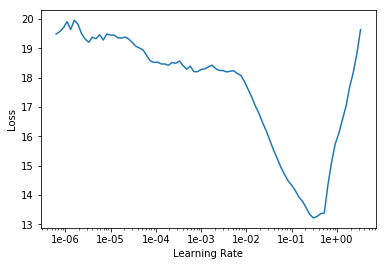

In [236]:
learn.recorder.plot()

In [237]:
learn.fit_one_cycle(3, 3e-2)

epoch,train_loss,valid_loss,exp_rmspe
1,1.761755,1.627551,11212.255859
2,1.521058,1.545312,567.272156
3,1.388212,1.527740,386.798706


In [238]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


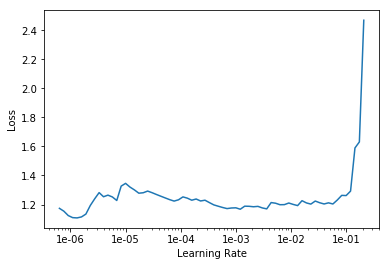

In [239]:
learn.recorder.plot()

In [240]:
learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,exp_rmspe
1,1.374188,1.536857,375.373718
2,1.245619,1.525315,387.165039
3,1.292145,1.530132,376.990845
4,1.307346,1.514585,403.936127
5,1.282009,1.524999,383.861572


In [243]:
??learn.loss_func.func

In [245]:
base_df.to_feather('base')

ArrowInvalid: Error converting from Python objects to Double: Got Python object of type str but can only handle these types: float

In [247]:
base_df.dtypes

Store                        category
DayOfWeek                    category
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                 category
SchoolHoliday                   int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear     category
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear              category
PromoInterval                category
Promo2SinceMonth              float64
CompetitionDaysOpen           float64
CompetitionWeeksOpen          float64
CompetitionMonthsOpen        category
Promo2Days                    float64
Promo2Weeks                  category
Promo2Months                  float64
Max_TemperatureC                int64
Mean_TemperatureC               int64
Min_Temperat

In [248]:
base_df['Promo_bwd']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
5          5.0
6          5.0
7          4.0
8          3.0
9          2.0
10         1.0
11         0.0
12         0.0
13         0.0
14         1.0
15         2.0
16         3.0
17         4.0
18         5.0
19         5.0
20         5.0
21         4.0
22         3.0
23         2.0
24         1.0
25         0.0
26         0.0
27         0.0
28         1.0
29         2.0
          ... 
1017179    2.0
1017180    1.0
1017181    0.0
1017182    0.0
1017183    0.0
1017184    1.0
1017185    2.0
1017186    3.0
1017187    4.0
1017188    5.0
1017189    5.0
1017190    5.0
1017191    4.0
1017192    3.0
1017193    2.0
1017194    1.0
1017195    0.0
1017196    0.0
1017197    0.0
1017198    1.0
1017199    2.0
1017200    3.0
1017201    4.0
1017202    5.0
1017203    5.0
1017204    5.0
1017205    4.0
1017206    3.0
1017207    2.0
1017208    1.0
Name: Promo_bwd, Length: 1017209, dtype: category
Categories (6, float64): [0.0 < 1.0